In [4]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib

import lsst.daf.butler as dB

# Collection without crosstalk correction

In [5]:
genCollection = "u/lgiraldo/bps_ALLCCD_v2_20220804"
butler = dB.Butler("/repo/main/", collections=genCollection)

# Collections with crosstalk correction

For CCDs 32 y 139. The "T" indicates that the crosstalk matrix was used as a transpose.

In [6]:
genCollection_crosstalk32 = "u/lgiraldo/bps_CCD32_crosstalk_expfit" 
butler_crosstalk32 = dB.Butler("/repo/main/", collections=genCollection_crosstalk32)

genCollection_crosstalk32T = "u/lgiraldo/bps_CCD32_crosstalk_Transpose_expfit" 
butler_crosstalk32T = dB.Butler("/repo/main/", collections=genCollection_crosstalk32T)

genCollection_crosstalk139 = "u/lgiraldo/bps_CCD139_crosstalk_expfit" 
butler_crosstalk139 = dB.Butler("/repo/main/", collections=genCollection_crosstalk139)

genCollection_crosstalk139T = "u/lgiraldo/bps_CCD139_crosstalk_Transpose_expfit" 
butler_crosstalk139T = dB.Butler("/repo/main/", collections=genCollection_crosstalk139T)

# CCD Identifiers

In [7]:
camera = butler.get("camera", instrument="LSSTCam")

det_name_to_id = {}  ##From name to number
det_id_to_name = {}  ##From number to name
det_name_array = []  ##List with names

for det in camera:
    #print(det.getName(), det.getId())
    detName, detId = det.getName(), det.getId()
    if detId < 189:
        det_name_to_id[detName] = detId
        det_id_to_name[detId] = detName
        det_name_array.append(detName)

CCD = 32
detector_id = det_id_to_name[CCD]
raftx, sensorx = detector_id.split("_")
print(f"The name of the detector {CCD} is {detector_id}, i.e. it is located in the raft {raftx} and is sensor {sensorx}")

The name of the detector 32 is R10_S12, i.e. it is located in the raft R10 and is sensor S12


In [8]:
det_id_to_name[74]

'R20_S02'

# Detector Vendor

In [9]:
def getDetector(raft, sensor):
    # Subroutine to find vendor and detector number given raft and sensor                                                                                                                                                           
    startingCol = [1,0,0,0,1] # First raft column in each row                                                                                                                                                                       
    rows = [0,3,8,13,18] # Starting raft sequence number of each row                                                                                                                                                                
    if raft in ['R11','R12','R13','R14','R21','R22','R23','R24','R30',\
                'R31','R32','R33','R34']:
        vendor = 'E2V'
    else:
        vendor = 'ITL'
    raftRow = int(list(raft)[1])
    raftCol = int(list(raft)[2])
    sensorRow = int(list(sensor)[1])
    sensorCol = int(list(sensor)[2])
    detectorNum = (rows[raftRow] + (raftCol - startingCol[raftRow])) * 9
    detectorNum += 3 * sensorRow + sensorCol
    return vendor, detectorNum

# Opening the crosstalk matrix

In [8]:
##E2V
crosstalk_m = fits.open('./Crosstalk/crosstalk_matrix_R32_S11_run13186.fits')
matrix_ct = crosstalk_m[0].data
print(crosstalk_m.info())
crosstalk_m.close()

##ITL
crosstalk_m1 = fits.open('./Crosstalk/crosstalk_matrix_R10_S12_13175.fits')
matrix_ct1 = crosstalk_m1[0].data
print(crosstalk_m1.info())
crosstalk_m1.close()

Filename: ./Crosstalk/crosstalk_matrix_R32_S11_run13186.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (16, 16)   float64   
None
Filename: ./Crosstalk/crosstalk_matrix_R10_S12_13175.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (16, 16)   float64   
None


# The LSST software requieres a 1D-array with crosstalk values

In [9]:
matrix_ct1.ravel()

array([ 0.00000000e+00,  7.09259832e-05,  2.71980631e-06,  3.50569667e-06,
       -8.83129142e-06, -7.38489561e-06, -7.60270318e-06, -3.02865448e-06,
       -4.49310768e-06, -6.93066424e-06, -7.09648262e-06, -4.48171438e-06,
       -4.86696033e-06, -4.99503771e-06,  7.20552118e-07, -1.29727221e-05,
        7.17575450e-05,  0.00000000e+00,  1.41738782e-04,  6.94441182e-05,
        4.39059475e-05,  2.22769615e-05, -4.07417274e-06, -5.31805611e-06,
       -2.75023897e-06, -4.87379861e-06, -4.67263800e-06, -3.45844592e-06,
       -3.62294578e-06, -1.67271395e-06, -4.32628865e-06, -4.62560022e-06,
        2.47648492e-05,  1.26186762e-04,  0.00000000e+00,  1.76150575e-04,
        8.03231439e-05,  4.74711901e-05, -2.41935511e-05, -5.40784649e-06,
       -4.14976027e-06, -7.25376214e-06, -6.27201723e-06, -4.95430106e-06,
       -3.36063130e-06, -4.33372799e-06, -6.09823301e-06, -6.29595411e-06,
        1.91134894e-05,  8.33233120e-05,  1.40525318e-04,  0.00000000e+00,
        1.26364064e-04,  

# Plot crosstalk matrix for detector 139 (E2V)

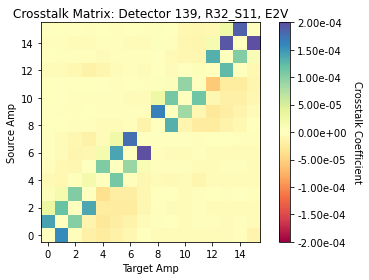

In [10]:
plt.imshow(matrix_ct, origin='lower', vmin = -2e-04, vmax = 2e-04,cmap= 'Spectral')
plt.title(f'Crosstalk Matrix: Detector 139, {det_id_to_name[139]}, E2V')
plt.xlabel('Target Amp')
plt.ylabel('Source Amp')
plt.xticks(np.arange(0, 16, 2))
cbar = plt.colorbar(format='%.2e');  #cax=cax)
cbar.ax.set_ylabel('Crosstalk Coefficient', rotation=270, labelpad=15);
plt.tight_layout()
plt.savefig('./Crosstalk/Crosstalk_139.png', bbox_inches='tight')

# Plot crosstalk matrix for detector 32  (ITL)

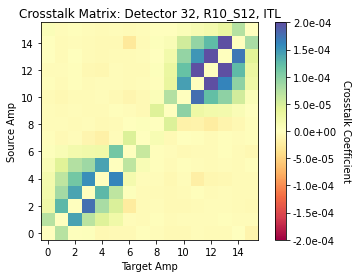

In [11]:
plt.imshow(matrix_ct1, origin='lower', vmin = -2e-04, vmax = 2e-04,cmap= 'Spectral')
plt.title(f'Crosstalk Matrix: Detector 32, {det_id_to_name[32]}, ITL')
plt.xticks(np.arange(0, 16, 2))
plt.xlabel('Target Amp')
plt.ylabel('Source Amp')
cbar = plt.colorbar( format='%.1e');  #cax=cax)
cbar.ax.set_ylabel('Crosstalk Coefficient', rotation=270,labelpad=15);
plt.savefig('./Crosstalk/Crosstalk_32.png', bbox_inches='tight')

In [12]:
DETECTOR = 32
ptcDataset_crosstalk = butler_crosstalk32.get('ptc', detector=DETECTOR, instrument='LSSTCam')
ptcDataset_crosstalk.requiredAttributes
(ptcDataset_crosstalk.noise['C00'])**0.5

8.176128785539163

In [10]:
ampNames = ['C00', 'C01', 'C02','C03','C04','C05','C06', 'C07', 
           'C10', 'C11', 'C12','C13','C14','C15','C16', 'C17']

# PTC fit

In [11]:
def ExpApprox(mu, g, a00, n):
    # This is the equation for the ExpApprox for use in the notebook
    if (g < 1.0E-6) or (abs(a00) < 1.0E-9):
        return np.zeros([len(mu)])
    else:
        expFactor = 2.0 * a00 * mu * g
        if max(expFactor) > 100.0:
            return np.zeros([len(mu)])
        else:
            preFactor = 1.0 / (2.0 * g * g * a00)
            noiseTerm = n / (g * g)
            return preFactor * (np.exp(expFactor) - 1.0) + noiseTerm

# Function to calculate variance difference between data with and without crosstalk correction

In [99]:
def diff_var_crosstalk_corr(butler, butler_crosstalk, raft, sensor, transpose=False):
    
    fig, axes = plt.subplots(4,4,figsize=(16,16))
    ##Count for amplifiers
    count = 0

    for i in range(4):
        for j in range(4):
            axes[i,j].scatter(0,0)
            ##Selecting the amplifier
            amp = ampNames[count]
            VENDOR, DETECTOR  = getDetector(raft, sensor)

            ptcDataset = butler.get('ptc', detector=DETECTOR, instrument='LSSTCam')
            ptcDataset_crosstalk = butler_crosstalk.get('ptc', detector=DETECTOR, instrument='LSSTCam')
           
            rawMeans = ptcDataset.rawMeans[amp]
            rawVars = np.array(ptcDataset_crosstalk.rawVars[amp]) - np.array(ptcDataset.rawVars[amp])

            axes[i,j].set_title(f"PTC, {raft}_{sensor}_{amp}, Det {DETECTOR}, {VENDOR}", fontsize = 14)
            axes[i,j].scatter(rawMeans, rawVars, marker = 'x', s=200, color = '#7570b3')
            
            GAIN_PERCENT = abs(ptcDataset_crosstalk.gain[amp]-ptcDataset.gain[amp])/ptcDataset.gain[amp]*100
            NOISE_PERCENT = abs(ptcDataset_crosstalk.noise[amp]-ptcDataset.noise[amp])/ptcDataset.noise[amp]*100
            TURNOFF_PERCENT = abs(ptcDataset_crosstalk.ptcTurnoff[amp]-ptcDataset.ptcTurnoff[amp])/ptcDataset.ptcTurnoff[amp]*100
            
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta g =${GAIN_PERCENT:.4f} %')
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta n =${NOISE_PERCENT:.4f} %')
            if ptcDataset_crosstalk.ptcFitType == 'EXPAPPROXIMATION':
                A00_PERCENT = abs(abs(ptcDataset_crosstalk.ptcFitPars[amp][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
                axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta a_{00} =$'+f'{A00_PERCENT:.4f} %')
            if ptcDataset_crosstalk.ptcFitType == 'FULLCOVARIANCE':
                A00_PERCENT = abs(abs(ptcDataset_crosstalk.aMatrix[amp][0][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
                axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta _{00} =$'+f'{A00_PERCENT:.4f} %')
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta to =${TURNOFF_PERCENT:.4f} %')
            #print(ptcDataset_crosstalk.noise[amp],ptcDataset.noise[amp])
        

            axes[i,j].set_xlabel("Mean  (ADU)", fontsize=16)
            axes[i,j].set_ylabel("Variance difference  (ADU)", fontsize=16)
            axes[i,j].set_xlim(0,125000)
            axes[i,j].axvline(ptcDataset.ptcTurnoff[amp], color='black')
            axes[i,j].axvline(ptcDataset_crosstalk.ptcTurnoff[amp], color='red', ls='--', label= 'PTC Turnoff')
            #axes[i,j].set_ylim(0,50000)
            legend = axes[i,j].legend(fontsize = 13, frameon=False)#, markerfirst=False)
            count +=1
            xtick_loc = [0, 30000, 60000, 90000]
            axes[i,j].set_xticks(xtick_loc);
            axes[i,j].tick_params(labelsize=14)
    fig.tight_layout()
    if transpose ==True:
        fig.savefig(f'./Crosstalk/ptc{DETECTOR}_transpose.png')
    else:
        fig.savefig(f'./Crosstalk/ptc{DETECTOR}.png')

In [100]:
det_id_to_name[32], det_id_to_name[139]

('R10_S12', 'R32_S11')

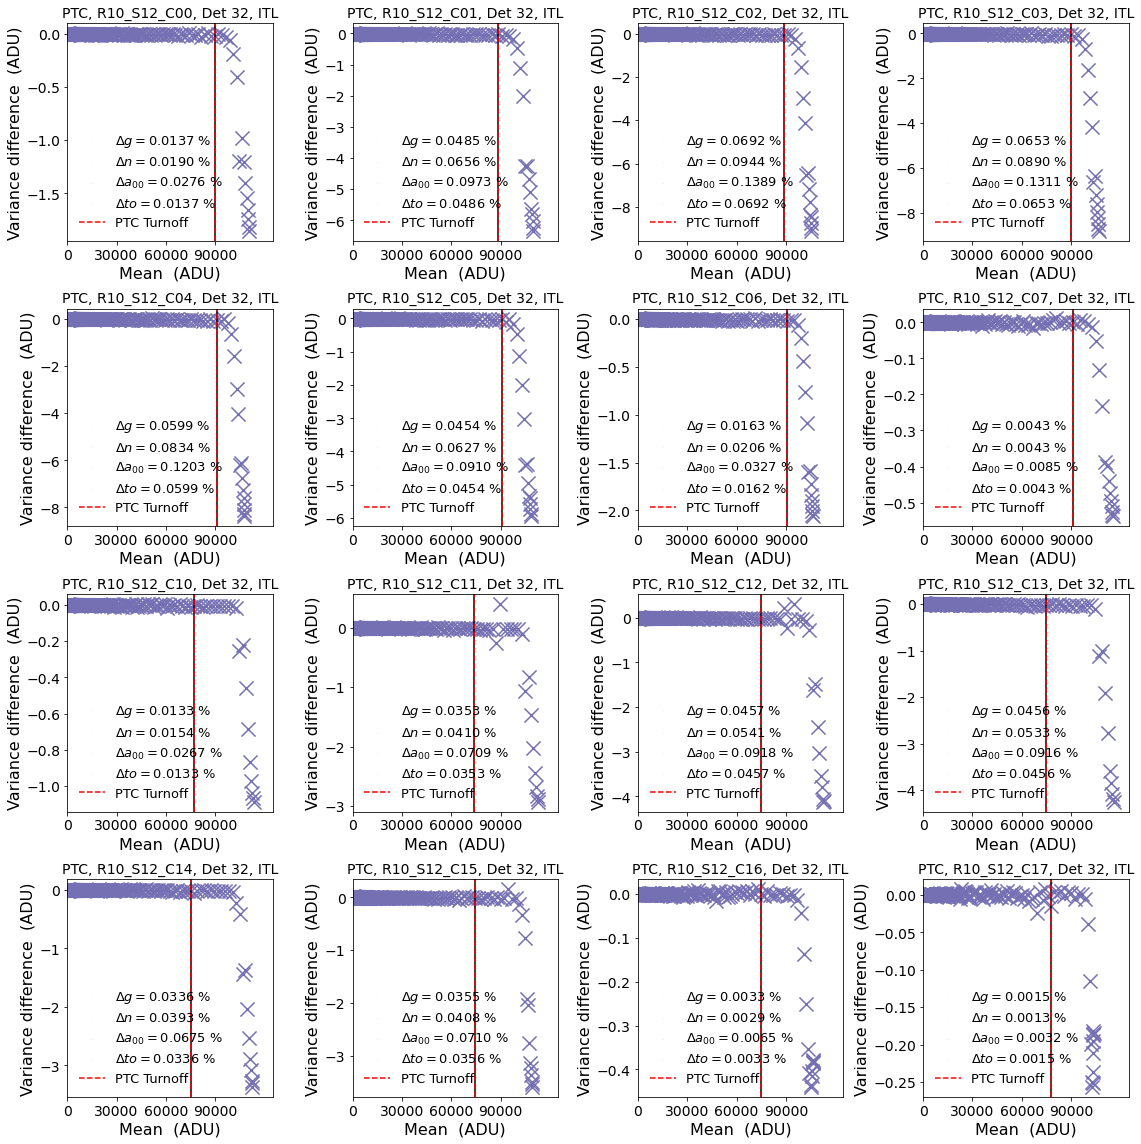

In [101]:
diff_var_crosstalk_corr(butler, butler_crosstalk32, 'R10', 'S12')

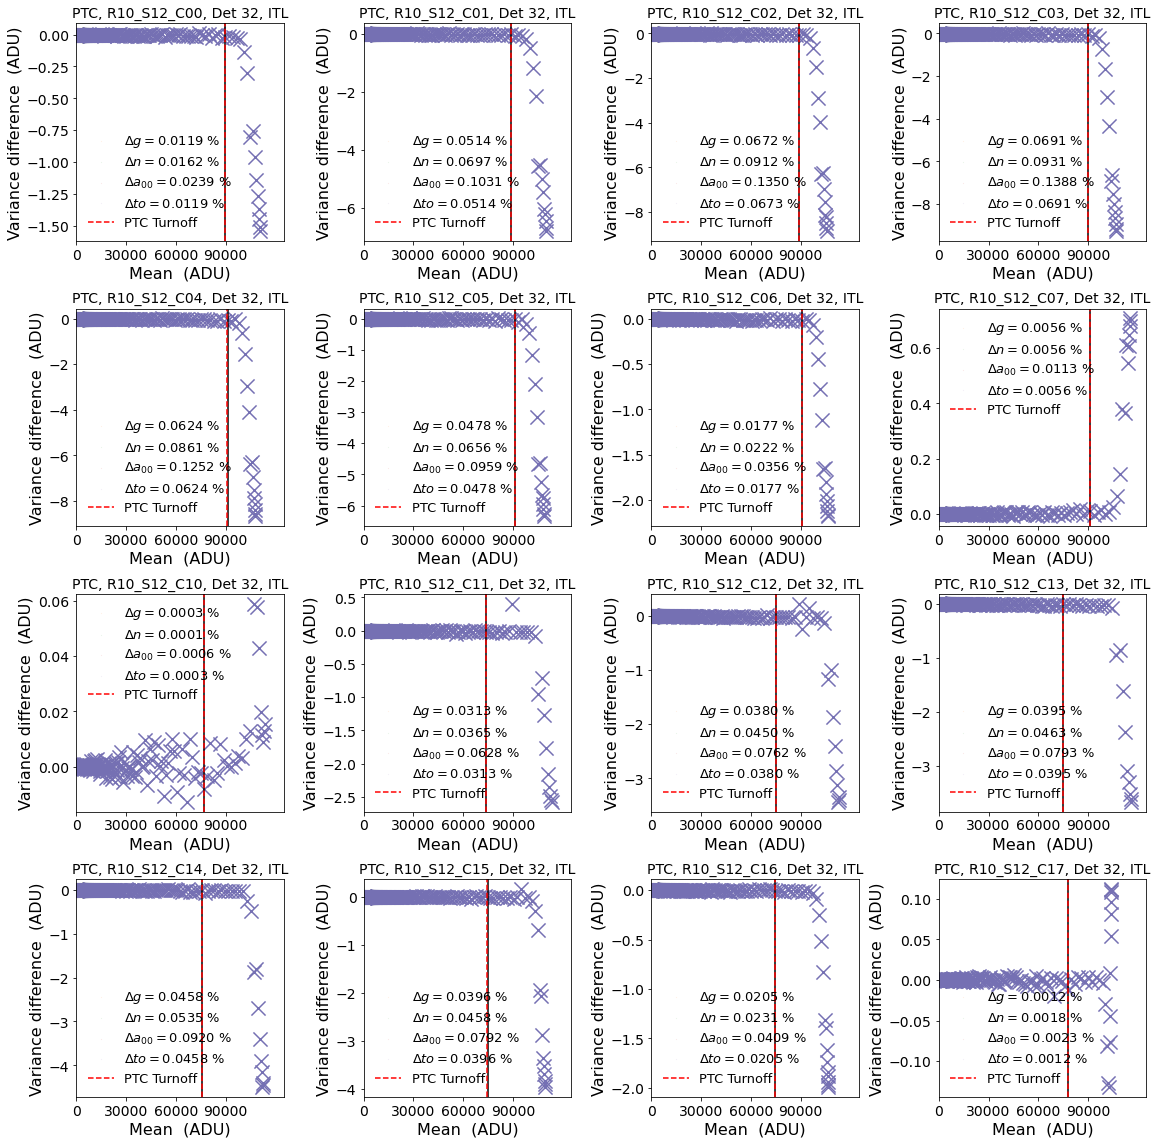

In [103]:
diff_var_crosstalk_corr(butler, butler_crosstalk32T, 'R10', 'S12', transpose=True)

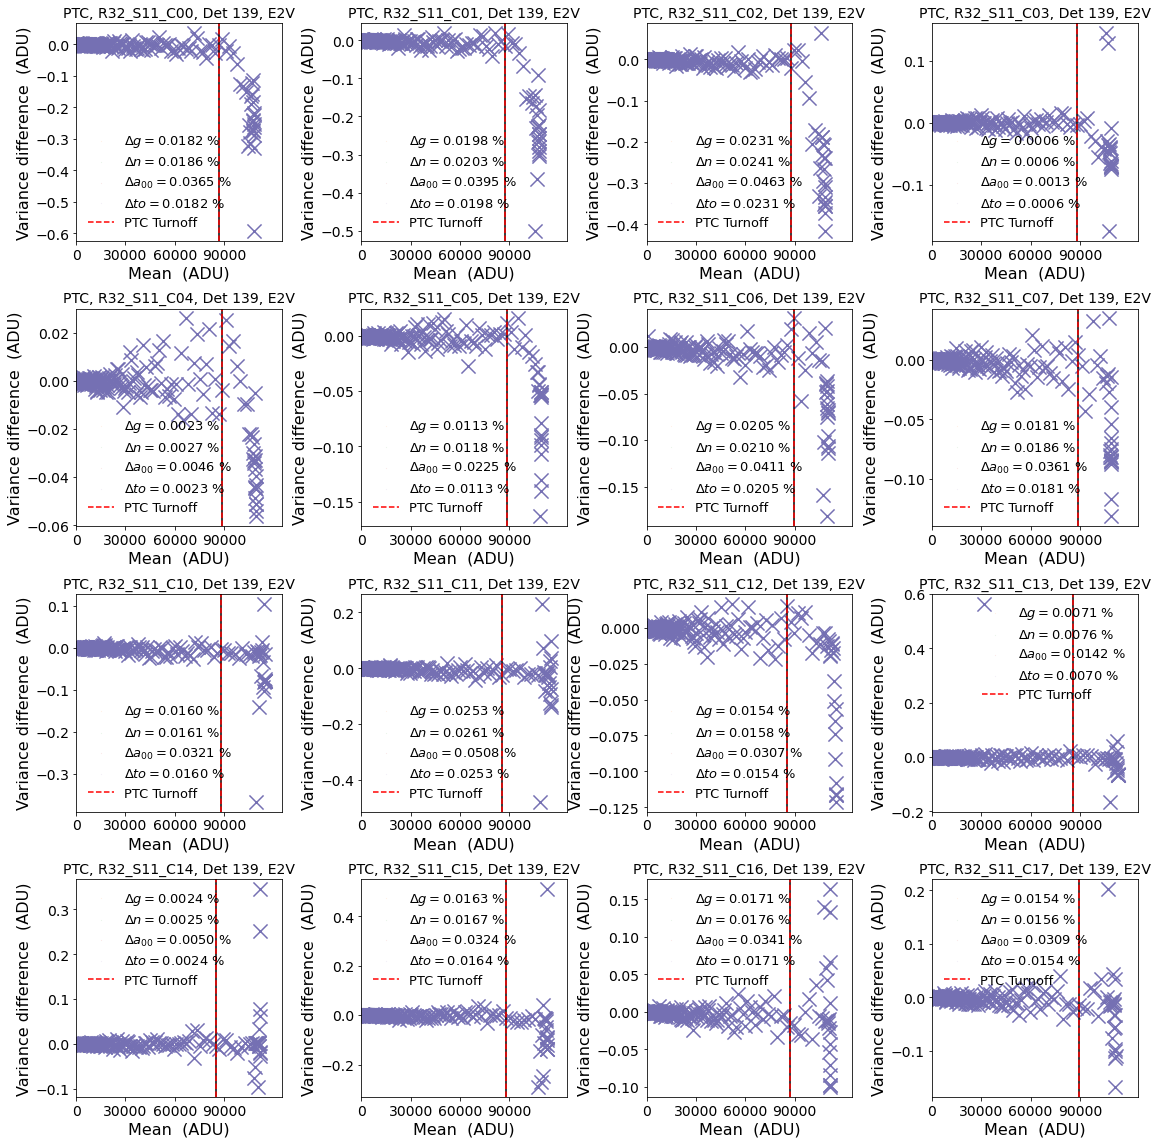

In [102]:
diff_var_crosstalk_corr(butler, butler_crosstalk139, 'R32', 'S11')

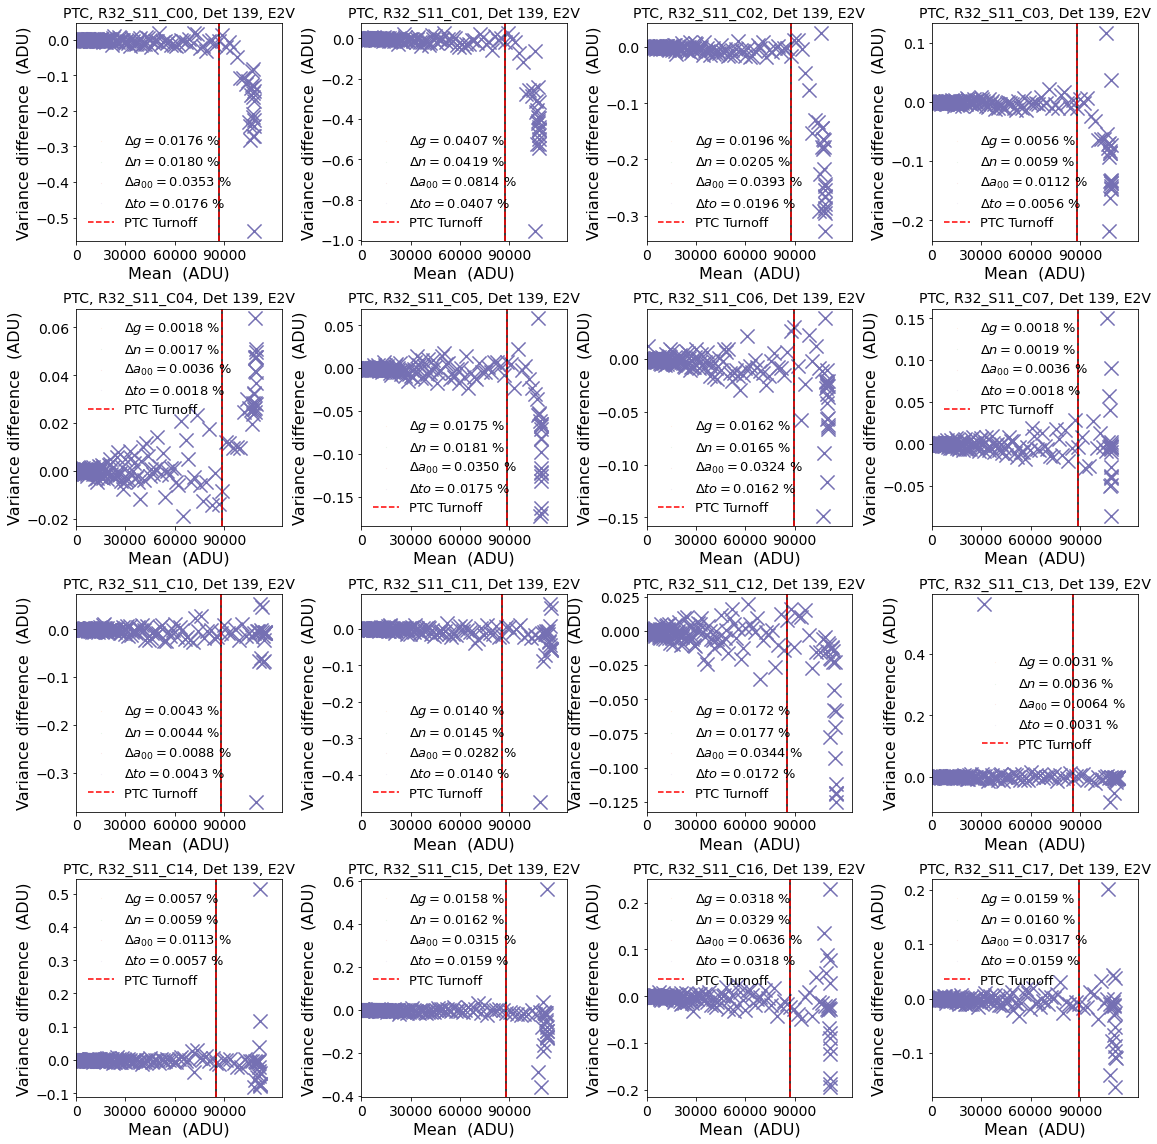

In [104]:
diff_var_crosstalk_corr(butler, butler_crosstalk139T, 'R32', 'S11', transpose=True)

# PTC plots

# Linearity correction

In [106]:
genCollection_LC139 = "u/jcalderong/reca/ptc_13144_crosstalktests_LCT139" ##Linearizer+Crosstalk
butler_LC139 = dB.Butler("/repo/main/", collections=genCollection_LC139)

genCollection_LC32 = "u/jcalderong/reca/ptc_13144_crosstalktests_LCT32" ##Linearizer+Crosstalk
butler_LC32 = dB.Butler("/repo/main/", collections=genCollection_LC32)

genCollection_L = "u/jcalderong/reca/ptc_13144_crosstalktests_L"  #Linearizer
butler_L = dB.Butler("/repo/main/", collections=genCollection_L)

In [110]:
def var_mean(butler, butler_crosstalk, raft, sensor, save, transpose=False):
    
    fig, axes = plt.subplots(4,4,figsize=(16,16))
    ##Count for amplifiers
    count = 0

    for i in range(4):
        for j in range(4):
            ##Selecting the amplifier
            amp = ampNames[count]
            VENDOR, DETECTOR  = getDetector(raft, sensor)

            ptcDataset = butler.get('ptc', detector=DETECTOR, instrument='LSSTCam')
            ptcDataset_crosstalk = butler_crosstalk.get('ptc', detector=DETECTOR, instrument='LSSTCam')
           
            rawMeans1 = ptcDataset.rawMeans[amp]
            rawVars1 = ptcDataset.rawVars[amp]
            VarMean1 = np.array(rawVars1)/np.array(rawMeans1)
        
            rawMeans = ptcDataset_crosstalk.rawMeans[amp]
            rawVars = ptcDataset_crosstalk.rawVars[amp]
            VarMean = np.array(rawVars)/np.array(rawMeans)
            axes[i,j].set_title(f"{raft}_{sensor}_{amp}, Det {DETECTOR}, {VENDOR}", fontsize = 18)
            axes[i,j].scatter(rawMeans, VarMean, marker = '.', s=50, color = '#7570b3', zorder=2)
            axes[i,j].scatter(rawMeans1, VarMean1, marker = '.', s=50, color = '#d95f02', zorder=1)
            
            GAIN_PERCENT = abs(ptcDataset_crosstalk.gain[amp]-ptcDataset.gain[amp])/ptcDataset.gain[amp]*100
            NOISE_PERCENT = abs(ptcDataset_crosstalk.noise[amp]-ptcDataset.noise[amp])/ptcDataset.noise[amp]*100
            TURNOFF_PERCENT = abs(ptcDataset_crosstalk.ptcTurnoff[amp]-ptcDataset.ptcTurnoff[amp])/ptcDataset.ptcTurnoff[amp]*100
            
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta g =${GAIN_PERCENT:.4f} %')
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta n =${NOISE_PERCENT:.4f} %')
            if ptcDataset_crosstalk.ptcFitType == 'EXPAPPROXIMATION':
                A00_PERCENT = abs(abs(ptcDataset_crosstalk.ptcFitPars[amp][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
                axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta a_{00} =$'+f'{A00_PERCENT:.4f} %')
            if ptcDataset_crosstalk.ptcFitType == 'FULLCOVARIANCE':
                A00_PERCENT = abs(abs(ptcDataset_crosstalk.aMatrix[amp][0][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
                axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta _{00} =$'+f'{A00_PERCENT:.4f} %')
            axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta to =${TURNOFF_PERCENT:.4f} %')
            #print(ptcDataset_crosstalk.noise[amp],ptcDataset.noise[amp])
        

            axes[i,j].set_xlabel("Mean  (ADU)", fontsize=18)
            axes[i,j].set_ylabel("Variance / Mean", fontsize=18)
            axes[i,j].set_xlim(0,120000)
            axes[i,j].axvline(ptcDataset.ptcTurnoff[amp], color='black')
            axes[i,j].axvline(ptcDataset_crosstalk.ptcTurnoff[amp], color='red', ls='--', label= 'PTC Turnoff')
            #axes[i,j].set_ylim(0,50000)
            if DETECTOR == 139:
                axes[i,j].legend(fontsize = 12, frameon=False, loc = 'lower left')
            else:
                axes[i,j].legend(fontsize = 12, frameon=False, loc = 'upper left')
            count +=1
            xtick_loc = [0, 30000, 60000, 90000]
            axes[i,j].set_xticks(xtick_loc);
            axes[i,j].tick_params(labelsize=14)
    fig.tight_layout()

    fig.savefig(f'./Crosstalk/Var_Mean_all_{save}_{DETECTOR}.png')

## For E2V

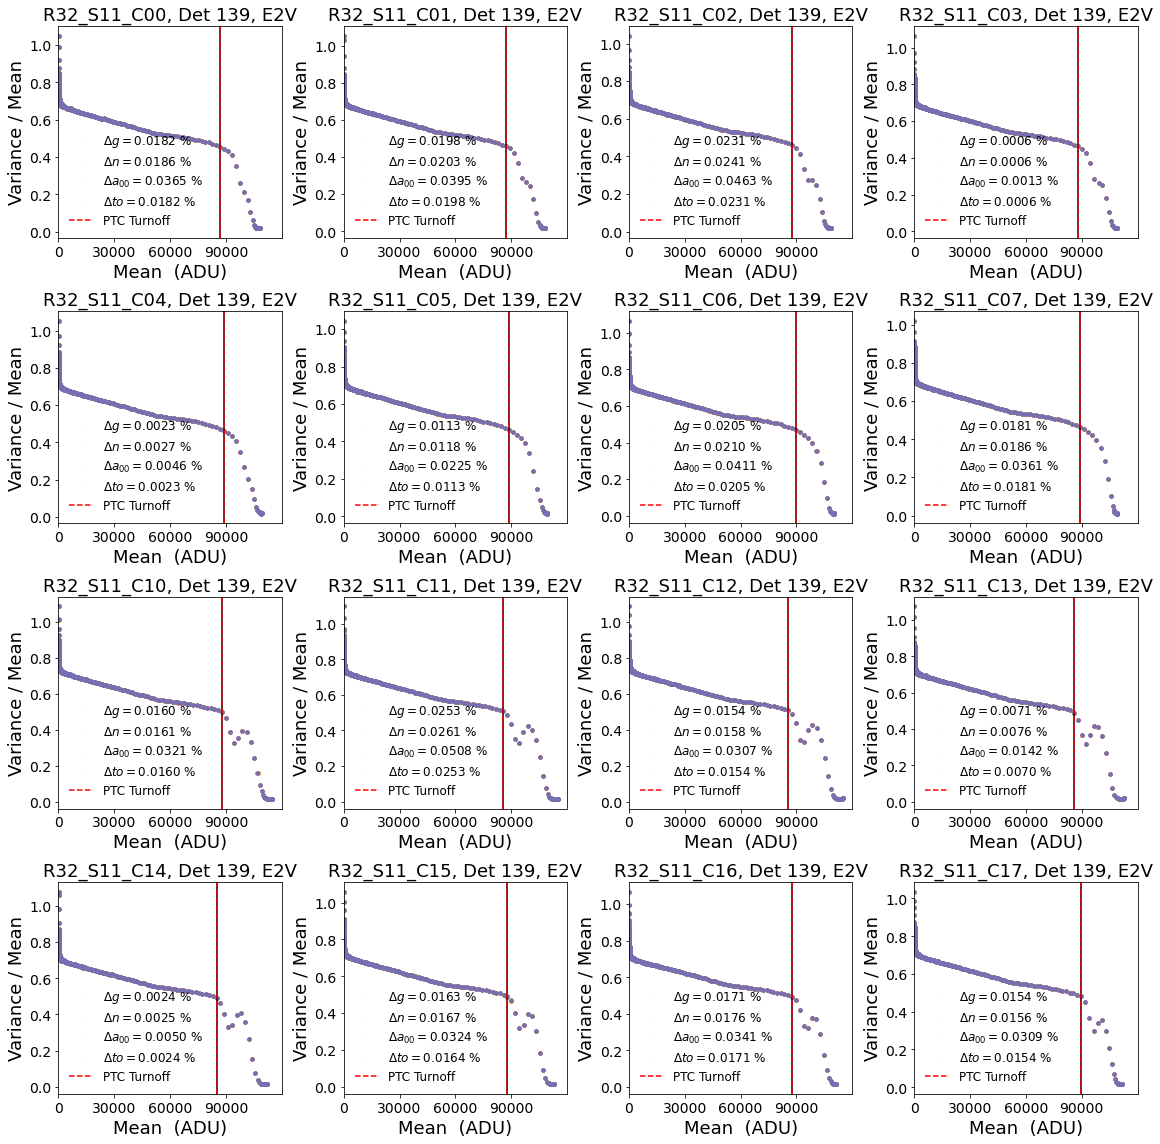

In [111]:
var_mean(butler, butler_crosstalk139, 'R32', 'S11', 'CT')

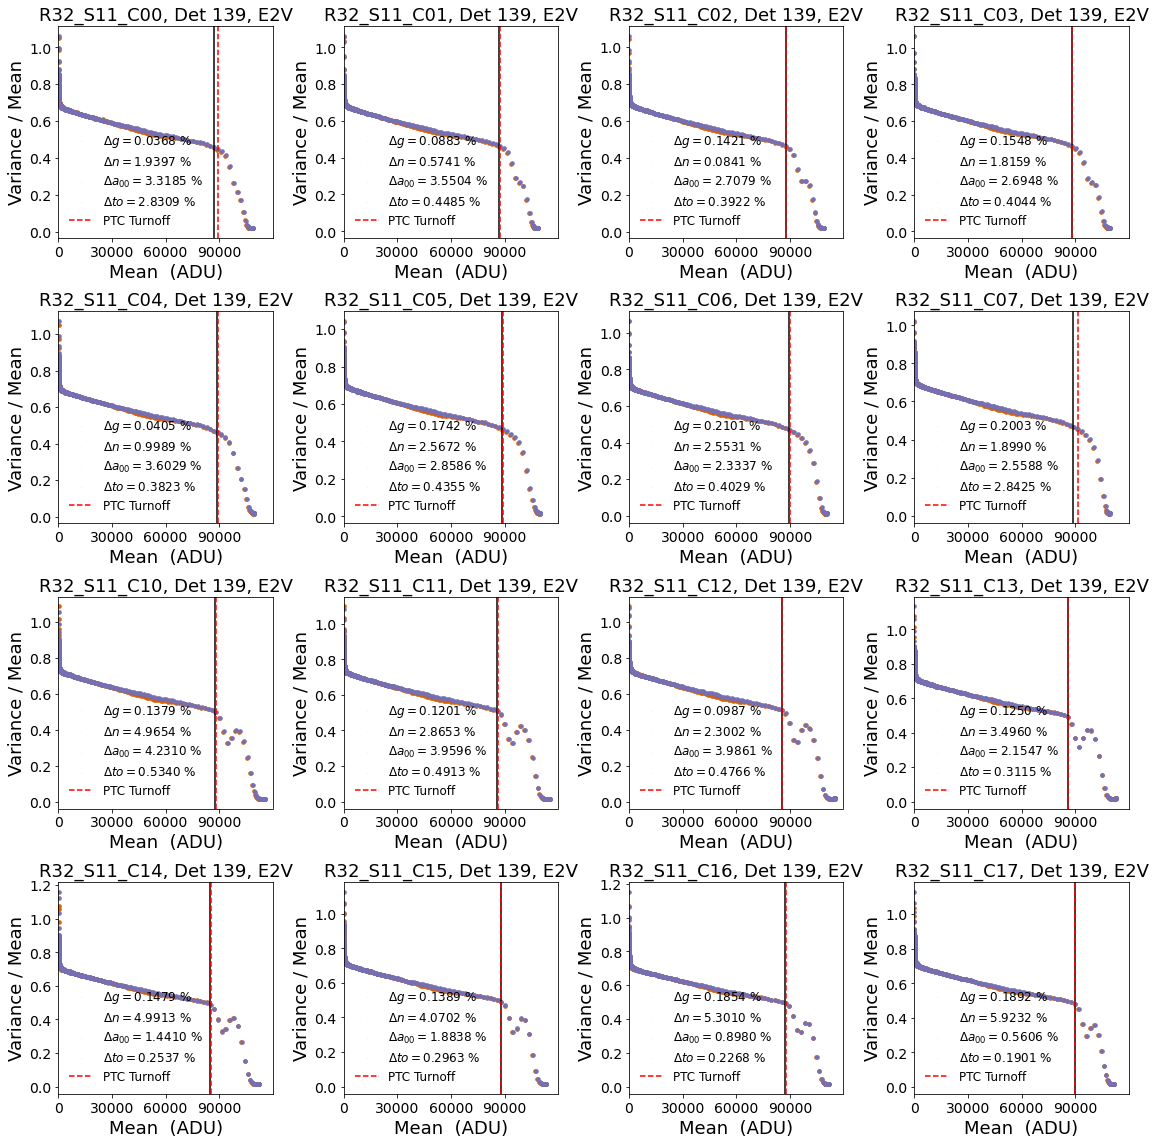

In [112]:
var_mean(butler, butler_L, 'R32', 'S11', 'L')

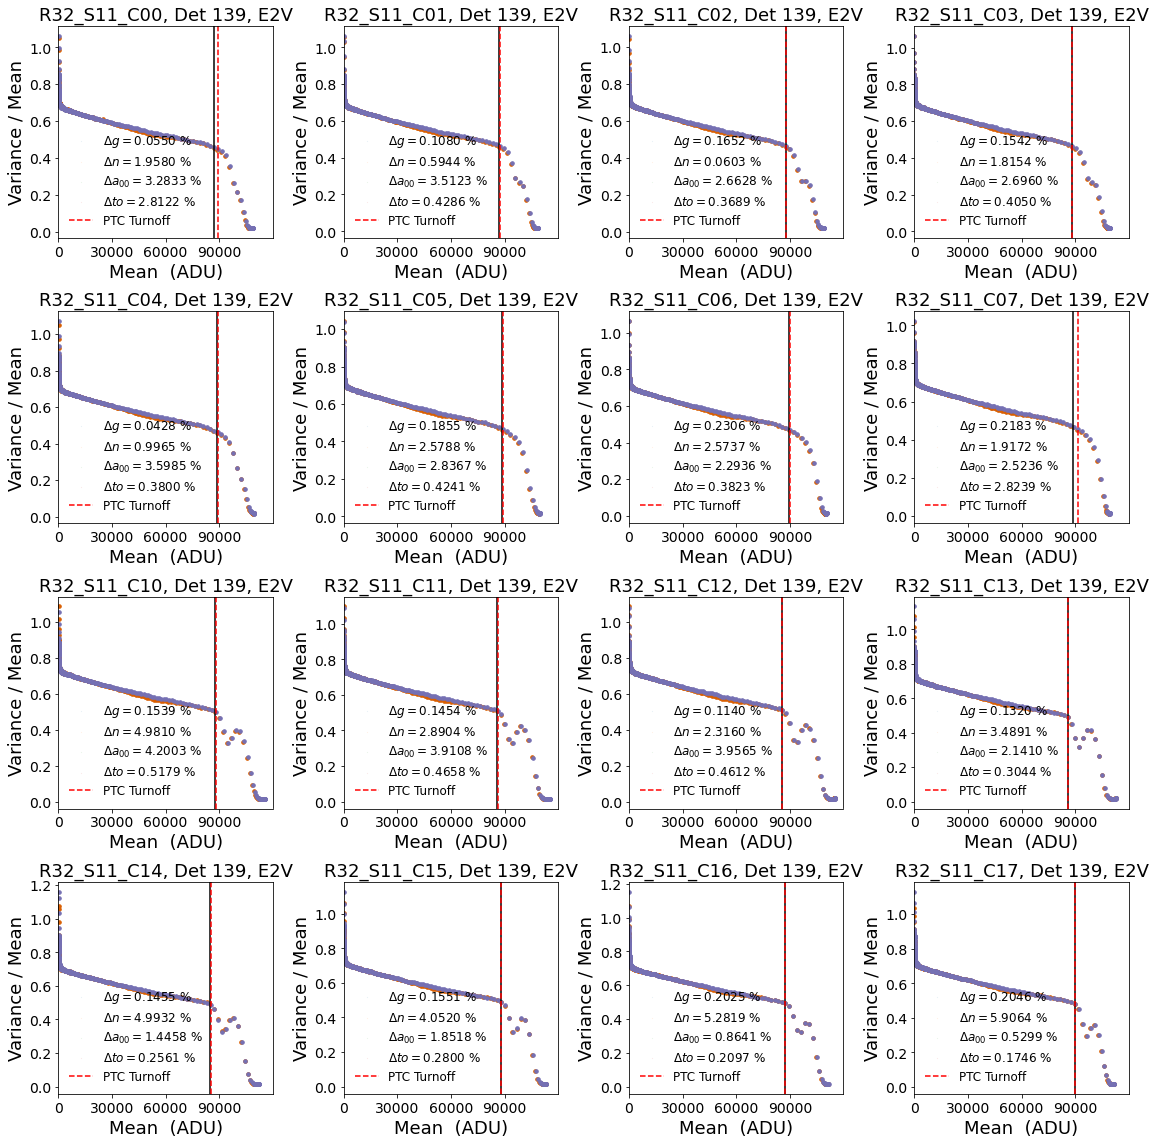

In [113]:
var_mean(butler, butler_LC139, 'R32', 'S11', 'CT+L')

## For ITL

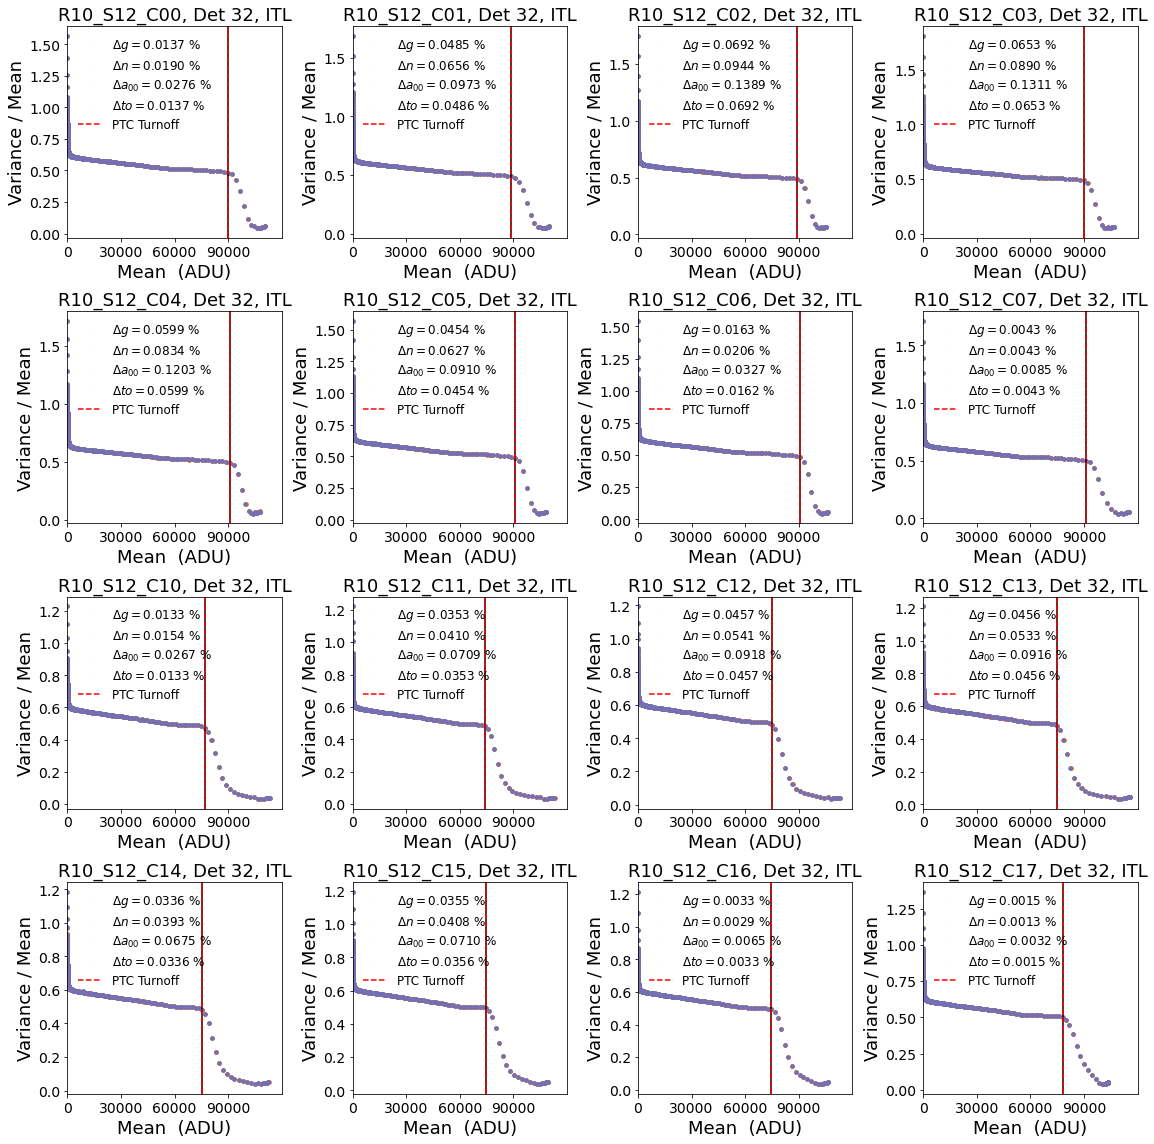

In [114]:
var_mean(butler, butler_crosstalk32, 'R10', 'S12', 'CT')

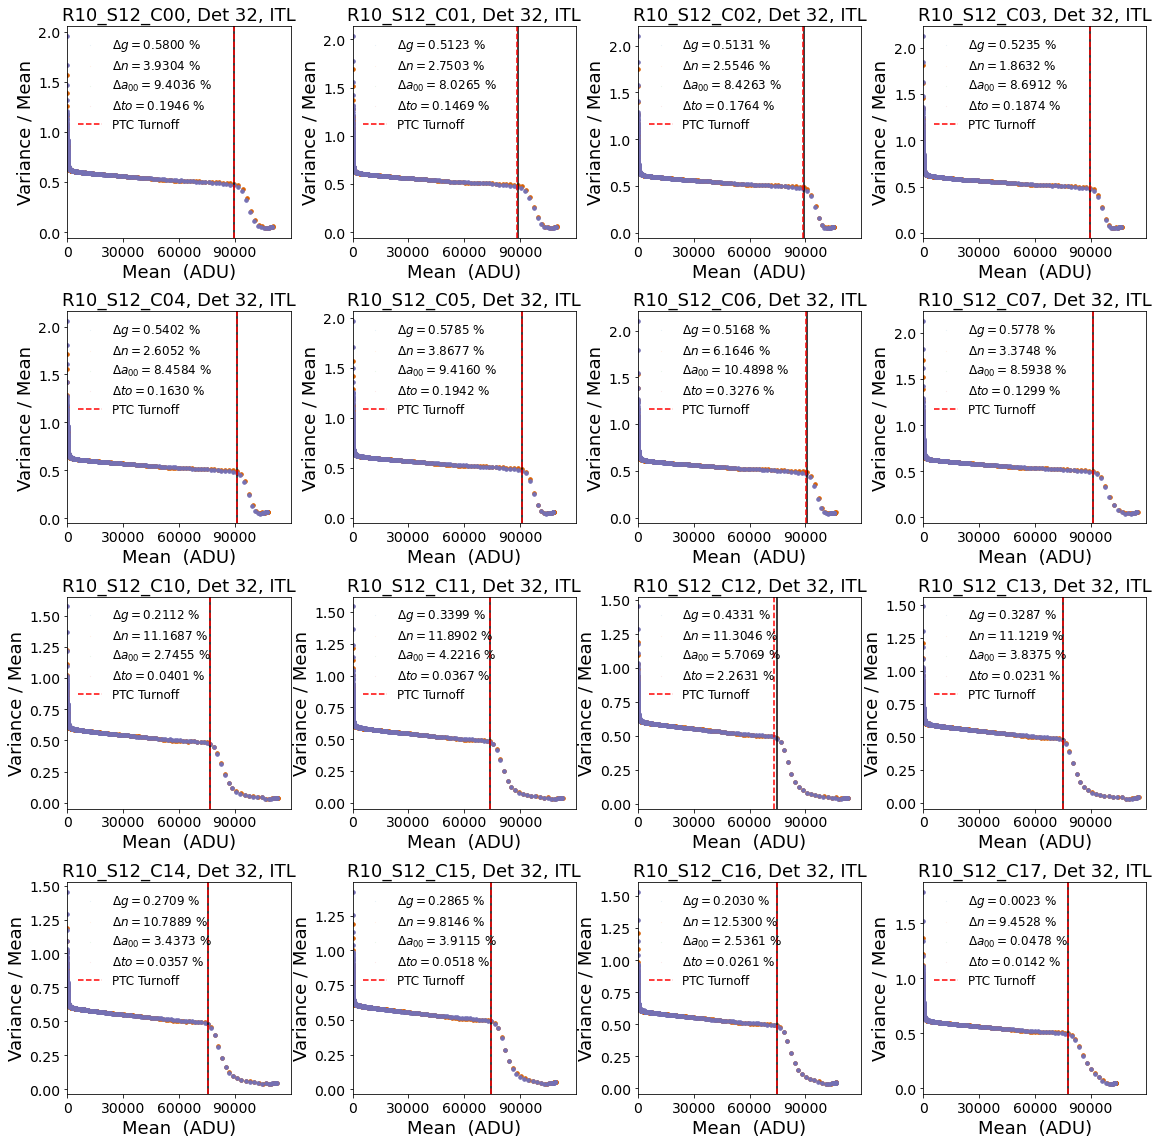

In [115]:
var_mean(butler, butler_L, 'R10', 'S12', 'L')

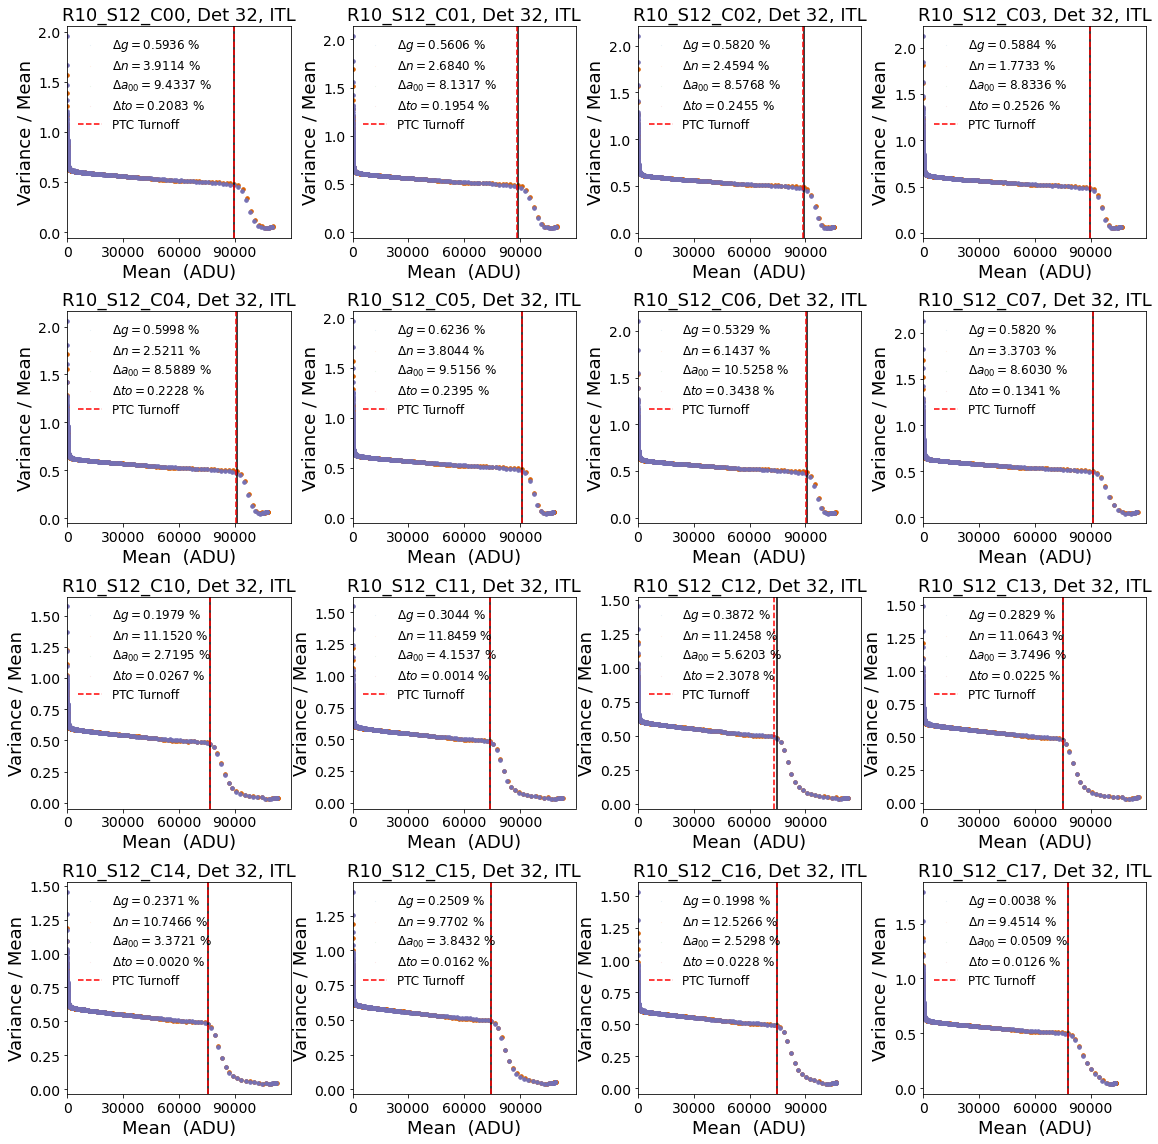

In [116]:
var_mean(butler, butler_LC32, 'R10', 'S12', 'CT+L')

In [117]:
def var_mean(butler, butler_crosstalk, butler_L, butler_CL, raft, sensor):
    
    fig, axes = plt.subplots(figsize=(10,10))
    amp = 'C00'
    VENDOR, DETECTOR  = getDetector(raft, sensor)

    ptcDataset = butler.get('ptc', detector=DETECTOR, instrument='LSSTCam')
    ptcDataset_crosstalk = butler_crosstalk.get('ptc', detector=DETECTOR, instrument='LSSTCam')
    ptcDataset_L = butler_L.get('ptc', detector=DETECTOR, instrument='LSSTCam')
    ptcDataset_CL = butler_CL.get('ptc', detector=DETECTOR, instrument='LSSTCam')
    
    rawMeans = ptcDataset.rawMeans[amp]
    rawVars = ptcDataset.rawVars[amp]
    VarMean = np.array(rawVars)/np.array(rawMeans)
    
    rawMeans1 = ptcDataset_crosstalk.rawMeans[amp]
    rawVars1 = ptcDataset_crosstalk.rawVars[amp]
    VarMean1 = np.array(rawVars1)/np.array(rawMeans1)
    
    rawMeans2 = ptcDataset_L.rawMeans[amp]
    rawVars2 = ptcDataset_L.rawVars[amp]
    VarMean2 = np.array(rawVars2)/np.array(rawMeans2)
    
    rawMeans3 = ptcDataset_CL.rawMeans[amp]
    rawVars3 = ptcDataset_CL.rawVars[amp]
    VarMean3 = np.array(rawVars3)/np.array(rawMeans3)
    
    axes.set_title(f"PTC, {raft}_{sensor}_{amp}, Det {DETECTOR}, {VENDOR}", fontsize = 18)
    axes.scatter(rawMeans, VarMean, marker = 's', s=50, color = '#f0027f', zorder=1, label= 'Data')
    axes.scatter(rawMeans1, VarMean1, marker = '.', s=50, color = '#fdc086', zorder=2, label='Crosstalk correction (CT)')
    axes.scatter(rawMeans2, VarMean2, marker = 'D', s=50, color = '#386cb0', zorder=2, label = 'Linearity correction (L)')
    axes.scatter(rawMeans3, VarMean3, marker = '2', s=50, color = '#beaed4', zorder=2, label = 'Crosstalk + Linearizer correction(CT + L)')
    
    GAIN_PERCENT = abs(ptcDataset_crosstalk.gain[amp]-ptcDataset.gain[amp])/ptcDataset.gain[amp]*100
    NOISE_PERCENT = abs(ptcDataset_crosstalk.noise[amp]-ptcDataset.noise[amp])/ptcDataset.noise[amp]*100
    TURNOFF_PERCENT = abs(ptcDataset_crosstalk.ptcTurnoff[amp]-ptcDataset.ptcTurnoff[amp])/ptcDataset.ptcTurnoff[amp]*100
    
    #axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta g =${GAIN_PERCENT:.4f} %')
    #axes[i,j].scatter([],[], s = 0.001, label = f'$\Delta n =${NOISE_PERCENT:.4f} %')
    if ptcDataset_crosstalk.ptcFitType == 'EXPAPPROXIMATION':
        A00_PERCENT = abs(abs(ptcDataset_crosstalk.ptcFitPars[amp][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
        #axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta a_{00} =$'+f'{A00_PERCENT:.4f} %')
    if ptcDataset_crosstalk.ptcFitType == 'FULLCOVARIANCE':
        A00_PERCENT = abs(abs(ptcDataset_crosstalk.aMatrix[amp][0][0]-ptcDataset.ptcFitPars[amp][0])/ptcDataset.ptcFitPars[amp][0])*100
        #axes[i,j].scatter([],[], s = 0.001, label = r'$\Delta _{00} =$'+f'{A00_PERCENT:.4f} %')
    #axes.scatter([],[], s = 0.001, label = f'$\Delta to =${TURNOFF_PERCENT:.4f} %')
    #print(ptcDataset_crosstalk.noise[amp],ptcDataset.noise[amp])
    

    axes.set_xlabel("Mean  (ADU)", fontsize=18)
    axes.set_ylabel("Variance / Mean", fontsize=18)
    axes.set_xlim(0,100000)
    axes.axvline(ptcDataset.ptcTurnoff[amp], color='black', label= 'PTC Turnoff')
    axes.axvline(ptcDataset_crosstalk.ptcTurnoff[amp], color='#fdc086', ls=':', label= 'PTC Turnoff CT')
    axes.axvline(ptcDataset_L.ptcTurnoff[amp], color='#386cb0', ls='--', label= 'PTC Turnoff L')
    axes.axvline(ptcDataset_CL.ptcTurnoff[amp], color='#beaed4', ls='-.', label= 'PTC Turnoff CT+L')
    if DETECTOR==139:
        axes.set_ylim(0.4,0.7)
    else: 
        axes.set_ylim(0.45,0.65)
    axes.legend(fontsize = 18, frameon=False, loc = 'lower left', markerscale = 2)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
        
    fig.tight_layout()

    fig.savefig(f'./Crosstalk/Variance_Mean_vs_Mean{DETECTOR}.png', dpi = 300)

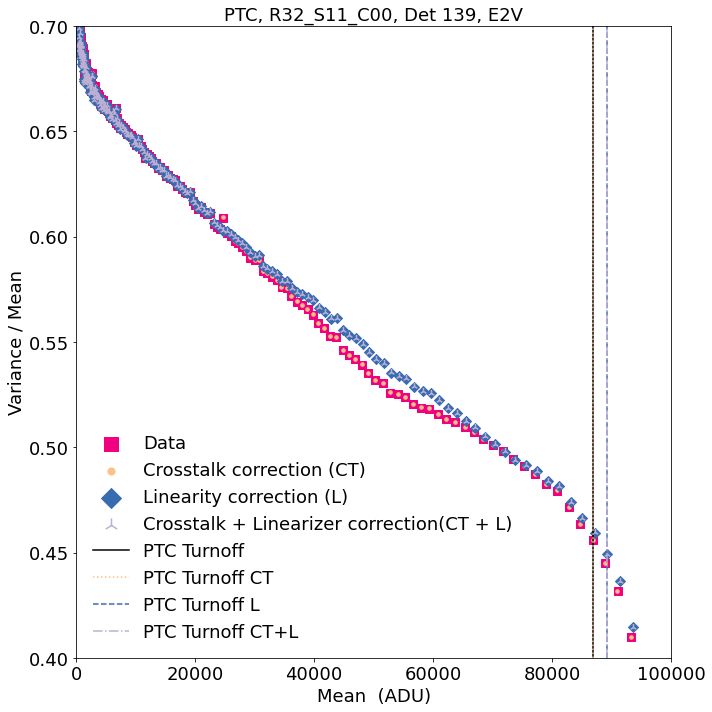

In [118]:
var_mean(butler, butler_crosstalk139, butler_L, butler_LC139, 'R32', 'S11')

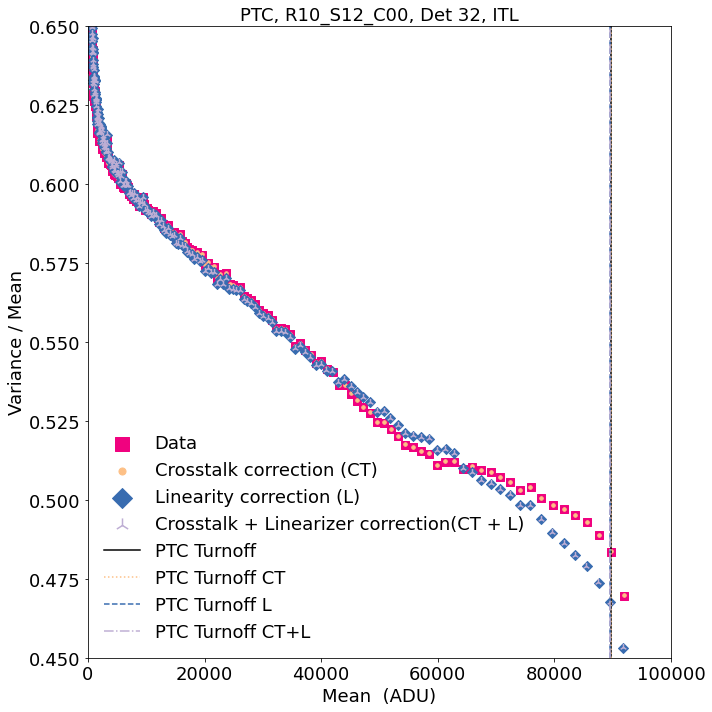

In [119]:
var_mean(butler, butler_crosstalk32, butler_L, butler_LC32, 'R10', 'S12')